<ipython-input-1-02c3dc825543>:26: RuntimeWarning: overflow encountered in exp
  pred = (k * P[0]) / (P[0] + (k - P[0]) * np.exp(-r * T))


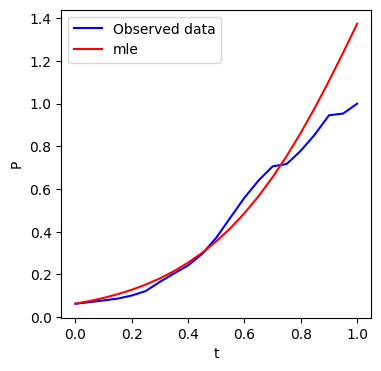

Optimized Parameters: r = 3.6654, k = 3.0329, std_dev = 0.3759


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

# Create an independent variable
P = np.array([379, 423, 472, 523, 610, 738, 995, 1231, 1457, 1783, 2239, 2805, 3366, 3852, 4250, 4317, 4691, 5149, 5689, 5737, 6016])

# Create a normally distributed residual
T = np.linspace(0, 20, 21)

# Visualize data distribution
P = P / max(P)
T = T / max(T)

# df = pd.DataFrame({'t': T, 'P(t)': P})
# sns.regplot(x='t', y='P(t)', data=df)
# plt.show()

# Define the MLE function
def MLE_Norm_3(parameter):
    r, k, std_dev = parameter
    pred = (k * P[0]) / (P[0] + (k - P[0]) * np.exp(-r * T))
    LL = np.sum(stats.norm.logpdf(P, pred, std_dev))
    neg_LL = -1 * LL
    return neg_LL

# Initial guess for r, k, and std_dev
initial_pred = (2 * P[0]) / (P[0] + (2 - P[0]) * np.exp(-5 * T))  # Initial guess with r=5, k=2
residuals = P - initial_pred
std_dev_initial = np.std(residuals)  # Estimate std dev from residuals

# Minimize the MLE function
mle_model_3 = minimize(MLE_Norm_3, np.array([1, 3, std_dev_initial]), method='L-BFGS-B')
pred_3 = mle_model_3.x
plt.figure(figsize=(4,4))
# Plot the observed data and the fitted model
plt.plot(T, P, 'b', label="Observed data")

# Plot the fitted model after optimization
plt.plot(T, (pred_3[1] * P[0]) / (P[0] + (pred_3[1] - P[0]) * np.exp(-pred_3[0] * T)), 'r', label="mle")
plt.xlabel('t')
plt.ylabel('P')
plt.legend()
plt.savefig("plot_mle.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Output the results
print("Optimized Parameters: r = {:.4f}, k = {:.4f}, std_dev = {:.4f}".format(pred_3[0], pred_3[1], pred_3[2]))


In [ ]:
from numpy import linalg
P_predict = (pred_3[1] * P[0]) / (P[0] + (pred_3[1] - P[0]) * np.exp(-pred_3[0] * T))
linalg.norm(P-P_predict)

0.5386199568201865